In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Variables initialization
#### you have to choose between option 1 or 2  
option 1: generate a 2d array filled by random values ranging from min_val to max_val  
option 2: generate a 2d array filled by fixed value 1  
Comment the cell that you don't want to use

In [3]:
# var init for an 2d array filled with random values
#min_val = 0, #
max_val = 32
# maxnum that the 2d array can contains
maxnum=20

In [4]:
def create_env(option=1, max_val = 10, maxnum=20):
    if option == 1:
        return np.random.randint(1, maxnum, size=(max_val, max_val))
    elif option ==2:
        return np.full((max_val, max_val), 1)
    else:
        print('an error has occured!')

In [5]:
# call the function create_env(option=1, max_val = 10, maxnum=20)
# params :
#    option: default value 1
#    max_val: default value 10
#    maxnum: default value 20
env = create_env(2, 32)

### define  start cell and finish cell

In [6]:
# start cell
env[0,0]=0
# finish cell
env[max_val-1,max_val-1]=0

### define the sum of all values in the array  
it's used to prensent value in a cell that represented as an obstacle

In [7]:
sum_env_values = sum(map(sum,env))

## generate some obstacles
the code below allows to specify some cells as an obstacles

In [8]:
# generate obstacles
for x in range(2, max_val):
    env[2, x] = sum_env_values
    
for x in range(2, max_val-3):
    env[x, 2] = sum_env_values
    
for x in range(5, max_val):
    env[x, 5] = sum_env_values

## Visualization of the environnement

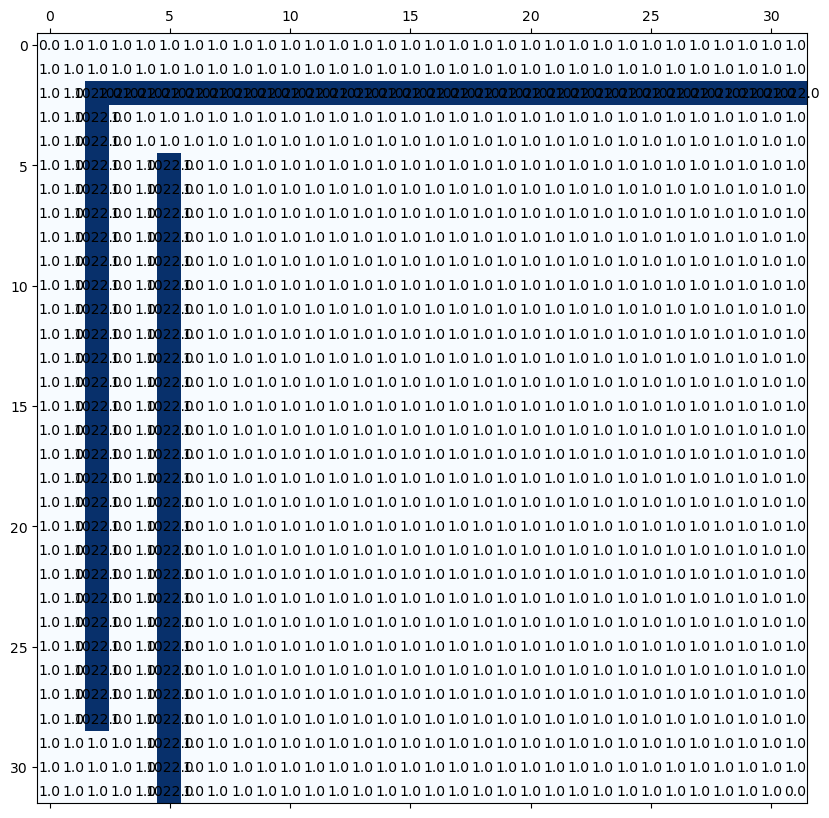

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
current_cmap = plt.cm.Blues
current_cmap.set_bad(color='red')
# ax.matshow(env, cmap=plt.cm.Blues, vmin=0, vmax=maxnum*2)
ax.matshow(env, cmap=plt.cm.Blues, vmin=0)
for (i, j), z in np.ndenumerate(env):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

## Initialize auxiliary arrays

In [10]:
distmap=np.ones((max_val,max_val),dtype=int)*np.Infinity
distmap[0,0]=0
originmap=np.ones((max_val,max_val),dtype=int)*np.nan
visited=np.zeros((max_val,max_val),dtype=bool)
finished = False
x,y=np.int(0),np.int(0)
count=0

## Loop Dijkstra until reaching the target cell

In [11]:
while not finished:
  # move to x+1,y
  if x < max_val-1:
    if distmap[x+1,y]>env[x+1,y]+distmap[x,y] and not visited[x+1,y]:
      distmap[x+1,y]=env[x+1,y]+distmap[x,y]
      originmap[x+1,y]=np.ravel_multi_index([x,y], (max_val,max_val))
  # move to x-1,y
  if x>0:
    if distmap[x-1,y]>env[x-1,y]+distmap[x,y] and not visited[x-1,y]:
      distmap[x-1,y]=env[x-1,y]+distmap[x,y]
      originmap[x-1,y]=np.ravel_multi_index([x,y], (max_val,max_val))
  # move to x,y+1
  if y < max_val-1:
    if distmap[x,y+1]>env[x,y+1]+distmap[x,y] and not visited[x,y+1]:
      distmap[x,y+1]=env[x,y+1]+distmap[x,y]
      originmap[x,y+1]=np.ravel_multi_index([x,y], (max_val,max_val))
  # move to x,y-1
  if y>0:
    if distmap[x,y-1]>env[x,y-1]+distmap[x,y] and not visited[x,y-1]:
      distmap[x,y-1]=env[x,y-1]+distmap[x,y]
      originmap[x,y-1]=np.ravel_multi_index([x,y], (max_val,max_val))

  visited[x,y]=True
  dismaptemp=distmap
  dismaptemp[np.where(visited)]=np.Infinity
  # now we find the shortest path so far
  minpost=np.unravel_index(np.argmin(dismaptemp),np.shape(dismaptemp))
  x,y=minpost[0],minpost[1]
  if x==max_val-1 and y==max_val-1:
    finished=True
  count=count+1

In [12]:
#Start backtracking to plot the path  
mattemp=env.astype(float)
x,y=max_val-1,max_val-1
path=[]
mattemp[np.int(x),np.int(y)]=np.nan

while x>0.0 or y>0.0:
  path.append([np.int(x),np.int(y)])
  xxyy=np.unravel_index(np.int(originmap[np.int(x),np.int(y)]), (max_val,max_val))
  x,y=xxyy[0],xxyy[1]
  mattemp[np.int(x),np.int(y)]=np.nan
path.append([np.int(x),np.int(y)])

## Output and visualization of the path

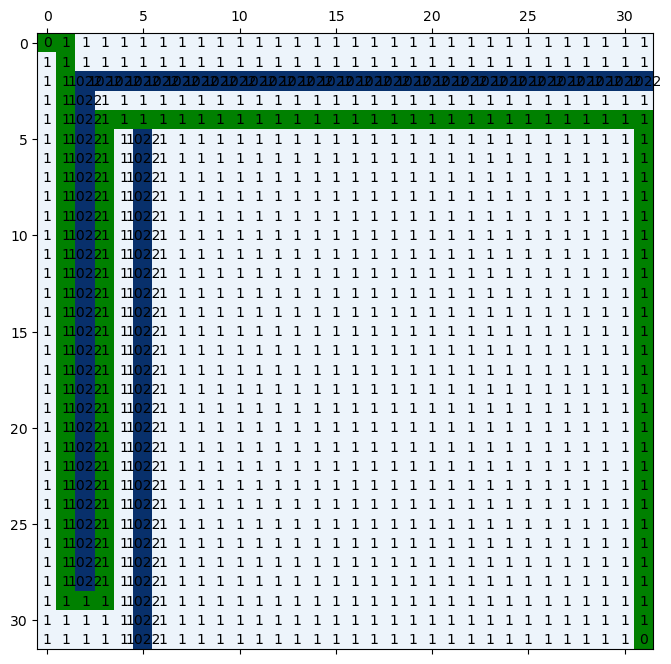

In [13]:

current_cmap = plt.cm.Blues
current_cmap.set_bad(color='green')
fig, ax = plt.subplots(figsize=(8,8))
ax.matshow(mattemp,cmap=plt.cm.Blues, vmin=0, vmax=20)
for i in range(max_val):
    for j in range(max_val):
      c = env[j,i]
      ax.text(i, j, str(c), va='center', ha='center')

In [14]:
print('The path length is: '+np.str(distmap[max_val-1,max_val-1]))

The path length is: 111.0
